In [26]:
import numpy as np 
# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.0242816  0.08389746 0.39521006 ... 0.04770099 0.34259274 0.2150215 ]
 [0.03356222 0.11596371 0.5462624  ... 0.06593268 0.47353433 0.29720438]
 [0.01875232 0.06479276 0.30521485 ... 0.03683876 0.26457927 0.16605791]
 ...
 [0.00758681 0.02621384 0.12348377 ... 0.01490422 0.10704344 0.06718368]
 [0.03495449 0.12077428 0.56892321 ... 0.06866779 0.49317813 0.30953342]
 [0.02900429 0.1002152  0.47207696 ... 0.05697866 0.40922575 0.25684239]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.16574215  0.04071745  0.32385143 ... -0.02087727  0.24867756
   0.28537576]
 [ 0.04446124  0.10182893  0.56725255 ...  0.11235994  0.57997429
   0.52237355]
 [ 0.18908545  0.12724641  0.37245098 ... -0.04446706  0.17288064
   0.08971608]
 ...
 [-0.15361889  0.09117477  0.11742586 ...  0.15984489  0.13671548
   0.16245388]
 [ 0.02550279  0.28565683  0.36655569 ...  0.01513873  0.4916835
   0.2431357 ]
 [-0.14759295  0.14979618  0.51131912 ...  0.01309027  0.33173456
   0.274

In [27]:
print(u)

[0.53427871 0.73848416 0.41261549 0.51999561 0.3547168  0.07234378
 0.4888113  0.5142921  0.1021436  0.4083669  0.54598897 0.13187756
 0.61637054 0.93780822 0.53735618 0.35762099 0.95088164 0.97597469
 0.66882858 0.32845249 0.30289091 0.37548254 0.83918157 0.14413391
 0.20705682 0.90569071 0.45196327 0.23818072 0.9918388  0.29717165
 0.27373099 0.73686608 0.45215571 0.71318164 0.80612911 0.93701423
 0.32272246 0.23916189 0.78604238 0.79534504 0.62846009 0.20169324
 0.46462365 0.51006702 0.39413113 0.30898263 0.56816153 0.16693591
 0.76911897 0.63819393]


In [28]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [29]:
mycebmf0= cEBMF(data    = noisy_matrix,  K=10)
mycebmf0.init_LF( )

In [30]:
mycebmf= cEBMF(data    = noisy_matrix,
               prior_L = "exp",
               prior_F = "exp",K=10)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

U, s, Vt = np.linalg.svd(mycebmf.data, full_matrices=False)
mycebmf.init_LF( )
U
mycebmf.L
 

array([[ 1.87948775e+00,  2.36745551e-02,  9.47682038e-02,
         1.87488928e-01, -7.25264773e-02, -1.73128203e-01,
        -2.01173559e-01, -1.71337545e-01, -2.12459750e-02,
        -2.04375654e-01],
       [ 2.66804004e+00, -3.33574601e-02, -1.95823625e-01,
         6.21587746e-02, -1.38747275e-01,  2.26342440e-01,
         1.23956114e-01, -6.04430065e-02, -1.88789099e-01,
        -5.68806380e-03],
       [ 1.58786893e+00,  1.09967045e-01,  4.86696362e-02,
        -5.87234013e-02,  2.67378449e-01, -1.15736522e-01,
        -1.05696827e-01, -7.62775317e-02,  4.57513370e-02,
         1.52061269e-01],
       [ 1.95848000e+00, -2.32949629e-01,  9.16258469e-02,
        -2.92981770e-02, -1.52811840e-01,  8.71842057e-02,
         1.31544724e-01,  4.98251198e-03,  3.91680002e-02,
         5.48802875e-02],
       [ 1.24926698e+00,  1.79563209e-01,  2.47617047e-02,
         1.23334192e-01, -6.70717061e-02,  8.66815746e-02,
        -5.07008508e-02,  1.48015484e-01,  1.66639592e-03,
        -7.

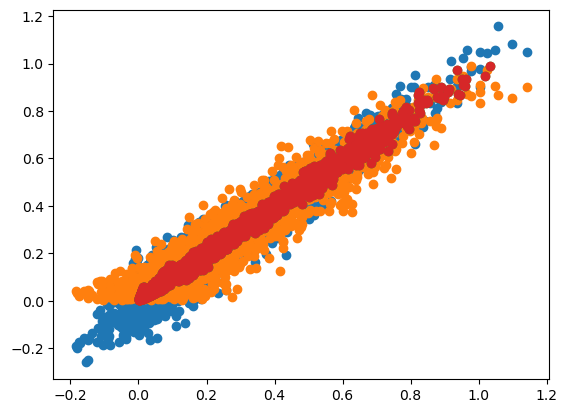

In [31]:
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix) 

plt.scatter(np.outer(mycebmf0.L[:,0],mycebmf0.F[:,0] ), rank_1_matrix) 

In [32]:
mycebmf.F

array([[ 0.01770796,  0.01059826,  0.04251256,  0.02768729,  0.22378464,
         0.15076347, -0.34753907,  0.11880015,  0.16119112, -0.23271556],
       [ 0.0444745 ,  0.17585996, -0.23223123, -0.27261832, -0.08532109,
         0.13419287, -0.11521485,  0.23150924,  0.26513875,  0.20933266],
       [ 0.1989387 , -0.01090073,  0.1843481 ,  0.06858698,  0.2161259 ,
         0.07933609, -0.14903255,  0.07952019, -0.2647134 , -0.11253538],
       [ 0.27210784, -0.11407635, -0.11073305, -0.2641539 , -0.07460321,
         0.03389492,  0.06701931, -0.20259012, -0.11874962, -0.0807349 ],
       [ 0.19631751,  0.13086751,  0.12113692,  0.07465491,  0.05879196,
        -0.09916218,  0.31196538,  0.22624095,  0.05007105,  0.21621384],
       [ 0.21727325, -0.15111333, -0.19062197, -0.10387293, -0.1925756 ,
        -0.14449428, -0.16376036, -0.11464185,  0.1695248 , -0.10096   ],
       [ 0.02613731,  0.12629975,  0.03294277, -0.32263035,  0.04959522,
         0.18753141, -0.09506453,  0.10990159

In [33]:
#3mycebmf.update_loading_factor_k(k=0)


In [34]:
#mycebmf0.update_loading_factor_k(k=0)


In [35]:
mycebmf0.L

array([[-1.87948799e+00,  2.36745533e-02,  9.47697759e-02,
         1.87488377e-01, -7.25253746e-02,  1.73128277e-01,
        -2.01171979e-01, -1.71339065e-01, -2.12469064e-02,
        -2.04375759e-01],
       [-2.66803908e+00, -3.33576910e-02, -1.95823058e-01,
         6.21611960e-02, -1.38747007e-01, -2.26342171e-01,
         1.23956397e-01, -6.04415722e-02, -1.88788801e-01,
        -5.68743050e-03],
       [-1.58787000e+00,  1.09967247e-01,  4.86695059e-02,
        -5.87243252e-02,  2.67378241e-01,  1.15735590e-01,
        -1.05696075e-01, -7.62782916e-02,  4.57520932e-02,
         1.52061507e-01],
       [-1.95848060e+00, -2.32949719e-01,  9.16254148e-02,
        -2.92985272e-02, -1.52812466e-01, -8.71837735e-02,
         1.31544545e-01,  4.98349639e-03,  3.91681194e-02,
         5.48801944e-02],
       [-1.24926639e+00,  1.79563060e-01,  2.47625839e-02,
         1.23333946e-01, -6.70718774e-02, -8.66810754e-02,
        -5.07022217e-02,  1.48015305e-01,  1.66681560e-03,
        -7.

In [36]:
k=1
mycebmf.cal_partial_residuals(k=k)

        # Compute estimates for L
lhat, s_l = compute_hat_f_and_s_f(mycebmf.Rk, mycebmf.L[:, k], mycebmf.L2[:, k], mycebmf.tau, mycebmf.has_nan)
res=ash(lhat, s_l, prior="exp")
res.log_lik

62.32260327614656

In [37]:
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")

from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

In [38]:
betahat , sebetahat= lhat, s_l

In [39]:
scale = autoselect_scales_mix_exp(betahat=betahat, sebetahat=sebetahat )
L = get_data_loglik_exp(betahat=betahat, sebetahat=sebetahat,   scale=scale)
exp_L = np.exp(L)
optimal_pi = optimize_pi(exp_L, penalty=10, verbose=False)
out = posterior_mean_exp(
        betahat,
        sebetahat,
        log_pi=np.log(optimal_pi + 1e-32),
        scale=scale)

In [40]:
out.post_mean

array([0.00127671, 0.01043892, 0.00103429, 0.00044429, 0.0054526 ,
       0.00034632, 0.0051166 , 0.00071764, 0.03231908, 0.01099479,
       0.00014589, 0.04331429, 0.00270489, 0.00398257, 0.03386922,
       0.0056831 , 0.000353  , 0.0017492 , 0.00717735, 0.00026189,
       0.00028064, 0.00105776, 0.00023366, 0.00018027, 0.00043433,
       0.00867152, 0.00114329, 0.00109486, 0.00043824, 0.00082366,
       0.00097684, 0.00098119, 0.00015072, 0.00815107, 0.00040779,
       0.00612288, 0.00616293, 0.00168359, 0.01630346, 0.00153823])

In [41]:
res_1=mycebmf.prior_L(mycebmf.X_l, lhat, s_l, mycebmf.model_list_L[k])

In [42]:
mycebmf.prior_L

<function cEBMF.prior_exp(X, betahat, sebetahat, model_param)>

In [43]:
res_1.post_mean


array([0.00132476, 0.01035941, 0.00107758, 0.00046975, 0.00548661,
       0.00036756, 0.00515569, 0.0007527 , 0.03155064, 0.0108996 ,
       0.00015657, 0.04229352, 0.00276363, 0.00403509, 0.03305855,
       0.00571337, 0.00037454, 0.0018036 , 0.00717906, 0.00027905,
       0.00029875, 0.00110157, 0.00024935, 0.000193  , 0.00045938,
       0.00863864, 0.00118887, 0.00113945, 0.00046346, 0.00086177,
       0.00101883, 0.00102328, 0.0001617 , 0.00813081, 0.00043173,
       0.00614549, 0.0061848 , 0.00173731, 0.01604348, 0.00159022])

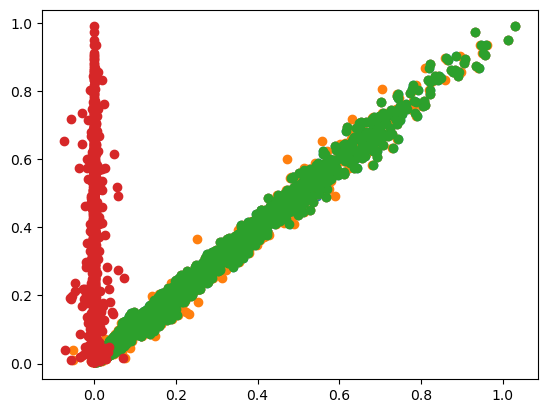

In [44]:

mycebmf .iter()
mycebmf0.iter() 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(mycebmf0.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)
plt.scatter(np.outer(mycebmf0.L[:,1],mycebmf0.F[:,1] ), rank_1_matrix)

In [45]:
for i in range(40):
    mycebmf.iter()
    mycebmf0.iter() 


KeyboardInterrupt: 

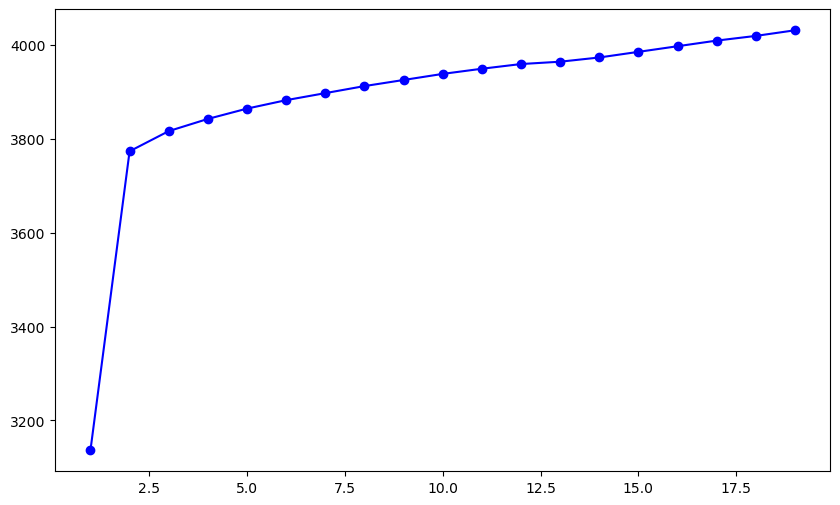

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj) , marker='o', linestyle='-', color='b')

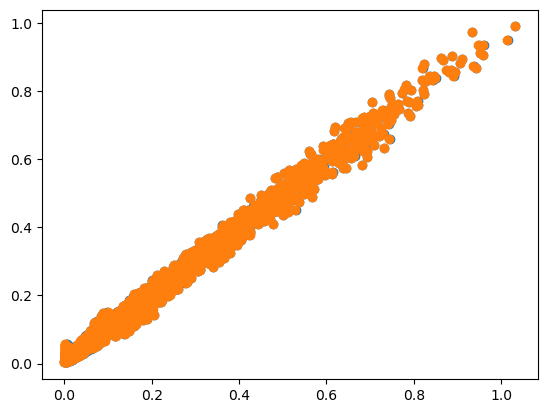

In [47]:
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
 
plt.scatter(mycebmf0.Y_fit, rank_1_matrix)


In [ ]:
np.sqrt(np.mean((np.outer(mycebmf.L[:,1],mycebmf.F[:,1] ) - rank_1_matrix) ** 2))

0.35371191131113816

In [ ]:
np.sqrt(np.mean((np.outer(mycebmf0.L[:,0],mycebmf0.F[:,0] ) - rank_1_matrix) ** 2))

0.02111083120802743

In [ ]:
mycebmf.prior_L

<function cEBMF.prior_exp(X, betahat, sebetahat, model_param)>

In [ ]:
mycebmf.L

array([[8.06021762e-06, 1.16975152e-05, 7.45306534e-05, 1.19025899e-05,
        6.02279033e-05, 9.60542729e-06, 8.47658430e-06, 9.71998543e-06,
        8.09557605e-06, 7.87684075e-06],
       [8.06155822e-06, 1.16994597e-05, 7.45426951e-05, 1.19045690e-05,
        6.02377368e-05, 9.60702437e-06, 8.47799402e-06, 9.72160160e-06,
        8.09692301e-06, 7.87815043e-06],
       [8.06783100e-06, 1.17085601e-05, 7.45990619e-05, 1.19138276e-05,
        6.02837390e-05, 9.61449859e-06, 8.48459058e-06, 9.72916496e-06,
        8.10322308e-06, 7.88428042e-06],
       [8.07393099e-06, 1.17174095e-05, 7.46538717e-05, 1.19228325e-05,
        6.03284752e-05, 9.62176728e-06, 8.49100616e-06, 9.73652004e-06,
        8.10934944e-06, 7.89024216e-06],
       [8.06300432e-06, 1.17015579e-05, 7.45556972e-05, 1.19067035e-05,
        6.02483415e-05, 9.60874786e-06, 8.47951560e-06, 9.72334601e-06,
        8.09837547e-06, 7.87956378e-06],
       [8.06678690e-06, 1.17070449e-05, 7.45896759e-05, 1.19122860e-05,
   

In [ ]:
k=0
mycebmf.cal_partial_residuals(k=k)

        # Compute estimates for L
lhat, s_l = compute_hat_l_and_s_l(mycebmf.Rk, mycebmf.F[:, k], mycebmf.F2[:, k], mycebmf.tau, mycebmf.has_nan)

In [ ]:
normal_means_loglik(x=lhat , 
                                            s=  s_l,
                                            Et=ash_obj.post_mean,
                                            Et2= ash_obj.post_mean2
                                           )

NameError: name 'ash_obj' is not defined

In [ ]:
ash_obj.log_lik


481.358716088944

In [ ]:
-0.5 * np.sum(np.log(2 * np.pi * s**2) + (1 / s**2) * (Et2 - 2 * x * Et + x**2))

ValueError: operands could not be broadcast together with shapes (40,) (50,) 

[0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063]


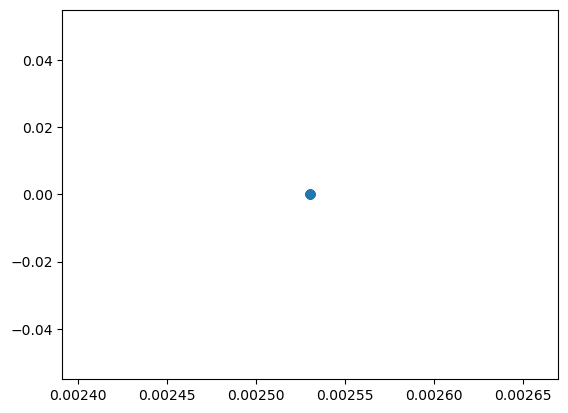

In [ ]:
optimal_pi
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat= betahat ,
                        sebetahat=sebetahat ,
                                 log_pi=log_pi , 
                                 scale=scale)
plt.scatter(out.post_mean, lhat)
print(out.post_mean)


In [ ]:
print(  np.sum(np.exp(L)*optimal_pi, axis=1) )

[6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05]


In [ ]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
print( np.exp(L)*optimal_pi )

[[6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]


In [ ]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)

print(L)

threshold_loglikelihood =  -300  # Example of a very small threshold
L = np.maximum(L,  (threshold_loglikelihood))
print(L)
log_lik =    np.sum(np.log(np.sum(np.exp(L)*optimal_pi, axis=1)))

[[-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.

In [ ]:
np.exp(L[1,]) 

array([6.59130391e-05, 6.52727797e-05, 6.46669294e-05, 6.35428623e-05,
       6.15701408e-05, 5.83767451e-05, 5.37149551e-05, 4.76576437e-05])

In [ ]:
i=6
print(scale)
print(betahat[i]/sebetahat[i])
convolved_logpdf_exp(betahat=betahat[i],
                                         sebetahat=sebetahat[i],  
                                         scale=scale)

[   0.          605.25527344  855.96021639 1210.51054687 1711.92043279
 2421.02109375 3423.84086557 4842.0421875 ]
0.0


array([-9.62717427, -9.63693546, -9.64626062, -9.66379588, -9.69533353,
       -9.74859295, -9.8318191 , -9.95146753])